# Mini-Project 3: Learning to make a machine see
## Svita Kiran - CS366
**10/22/36**

## 1. Setup and Data Loading

**1.1 Import Libraries**

In [1]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import cv2
import pandas as pd

**1.2 Load Dataset**

In [ ]:
## get the dataset and assign it to a variable

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()

**1.3 Explore Data**

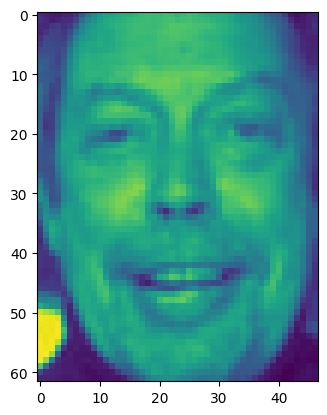

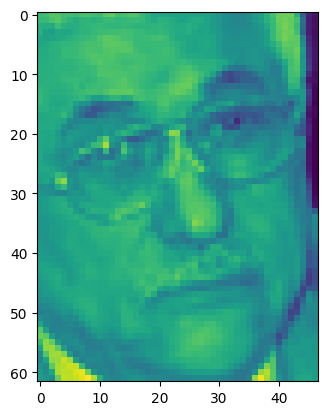

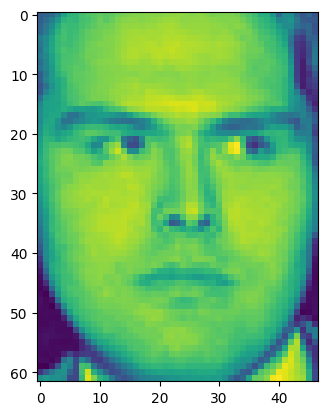

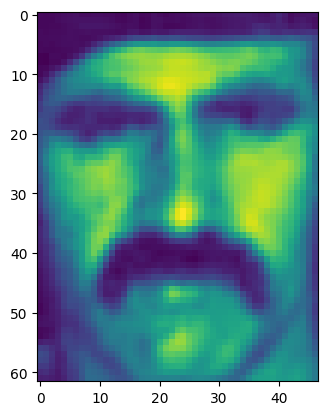

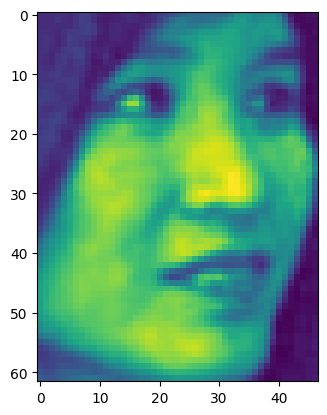

(13233, 62, 47)
5749
[1 1 1 ... 1 1 1]


In [ ]:
## loads images and labels, shows sample images, summarizes dataset structure (shape, # of classes,
## samples per class)

x = faces.images
y = faces.target

for i in range(5):
    plt.imshow(x[i])
    plt.show()

print(x.shape)
# classes
print(len(np.unique(y)))
# samples/class
(unique, counts) = np.unique(y, return_counts=True)
print(counts)
# no temporal ordering

## 2. Data Preprocessing and Splitting

**2.1 Split Data**

In [ ]:
## splits dataset into training (70%), val (10%), test (20%) sets
## using random sampling for reproducibility, then prints their shapes

from sklearn.model_selection import train_test_split

trainX, tempX, trainY, tempY = train_test_split(x, y, test_size = 0.3, random_state = 42)
valX, testX, valY, testY = train_test_split(tempX, tempY, test_size = 2/3, random_state = 42)

print(trainX.shape)
print(valX.shape)
print(testX.shape)

(9263, 62, 47)
(1323, 62, 47)
(2647, 62, 47)


**2.2 Data Scaling/Normalization**

In [ ]:
## flattens 2d images into 1d feature vectors and scales pixel values to the [0, 1] range
## using MinMaxScaler for consistent normalization across training, val, test sets

from sklearn.preprocessing import MinMaxScaler

n_samples, h, w = trainX.shape
trainX_reshaped = trainX.reshape(n_samples, h * w)
valX_reshaped = valX.reshape(valX.shape[0], h * w)
testX_reshaped = testX.reshape(testX.shape[0], h * w)

scaler = MinMaxScaler()
trainX_scaled = scaler.fit_transform(trainX_reshaped)
valX_scaled = scaler.transform(valX_reshaped)
testX_scaled = scaler.transform(testX_reshaped)

## 3. Model Training and Prediction

**3.1 Choose a Classifier as a baseline**

In [ ]:
## initialize SVC classifier

from sklearn.svm import SVC

classifier = SVC()

**3.2. Initialize and Train**

In [ ]:
## train classifier on trained data

classifier.fit(trainX_scaled, trainY)

SVC()

**3.3 Make Prediction**

In [ ]:
## make prediction using the classifier and the test data

y_pred = classifier.predict(testX_scaled)
print(y_pred[:10])

[1871 1892 1047 1871 1871 1871 2175 1871 1871 1047]


## 4. Model Evaluation

**4.1 Calculate Accuracy**

In [ ]:
## calculate the accuracy using method from scikit-learn library

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(testY, y_pred)
print(accuracy)

0.10162448054401209


**4.2 Generate a Classification Report**

In [ ]:
## generates a classification report (precision, recall, F1-score) for model prediction on the test
## set, converts it into a pandas df, prints preview

from sklearn.metrics import classification_report

unique = np.unique(testY)
#report = classification_report(testY, y_pred, labels = unique, target_names = faces.target_names[unique])
report = classification_report(testY, y_pred, target_names = None, digits = 3, output_dict = True)
df = pd.DataFrame(report)
print(df.head)

<bound method NDFrame.head of              3    8   14   19   20   21   22   25   26   28  ...  5704  5709  \
precision  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.5   0.0   
recall     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.5   0.0   
f1-score   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.5   0.0   
support    1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0  1.0  ...   2.0   1.0   

           5711  5727  5728  5737  5740  accuracy    macro avg  weighted avg  
precision   0.0   0.0   0.0   0.0   0.0  0.101624     0.008386      0.046557  
recall      0.0   0.0   0.0   0.0   0.0  0.101624     0.008794      0.101624  
f1-score    0.0   0.0   0.0   0.0   0.0  0.101624     0.006382      0.042649  
support     1.0   1.0   1.0   1.0   1.0  0.101624  2647.000000   2647.000000  

[4 rows x 1651 columns]>


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

**4.3 Visualize Confusion Matrix**

<Axes: >

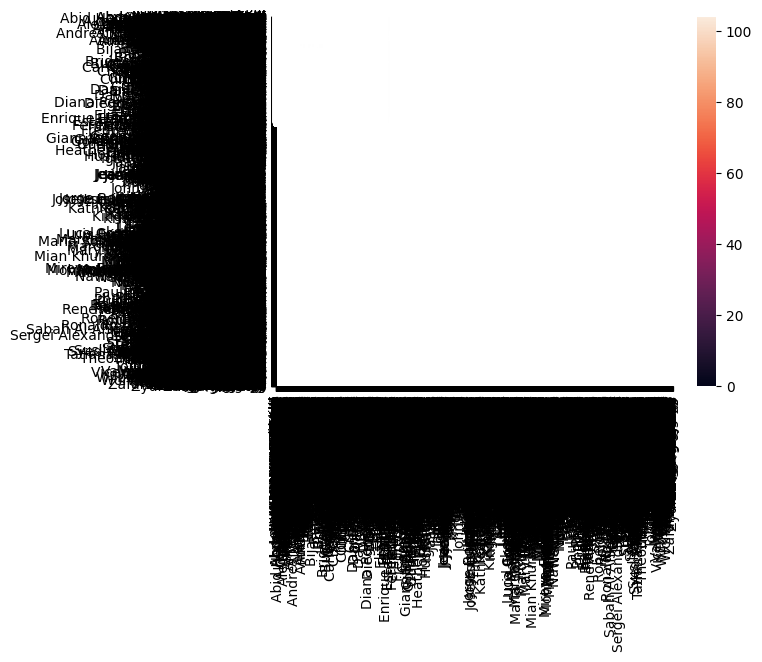

In [ ]:
## creates and visualizes a confusion matrix to show how well the model classified each face class

from sklearn.metrics import confusion_matrix

#plt.figure(figsize=(10, 8))
matrix = confusion_matrix(testY, y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd', xticklabels = faces.target_names, yticklabels = faces.target_names)
#plt.pyplot.imshow()

## 5. Hyperparameter Tuning and Overfitting/Underfitting Analysis

**5.1 Hyperparameter Tuning**

In [ ]:
## performs a simple grid search over SVM hyperparameters (C and gamma), trains and validates models
## to find the best parameter combination based on val accuracy

gamma_param = ['scale', 'auto']
C_param = [0.1, 1, 10]

bestAcc = 0
bestParams = {}

for C in C_param:
    for gamma in gamma_param:
        classifier = SVC(C = C, gamma = gamma)
        classifier.fit(trainX_scaled, trainY)
        y_pred_val = classifier.predict(valX_scaled)
        acc = (y_pred_val == valY).mean()

        print(C, gamma, acc)
        if acc > bestAcc:
            bestAcc = acc
            bestParams = {'C': C, 'gamma': gamma}

print(bestParams)
print(bestAcc)

0.1 scale 0.030234315948601664
0.1 auto 0.030234315948601664
1 scale 0.09750566893424037
1 auto 0.030234315948601664
10 scale 0.13756613756613756
10 auto 0.08238851095993953
{'C': 10, 'gamma': 'scale'}
0.13756613756613756


**5.2 Analyze Learning Curves**

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


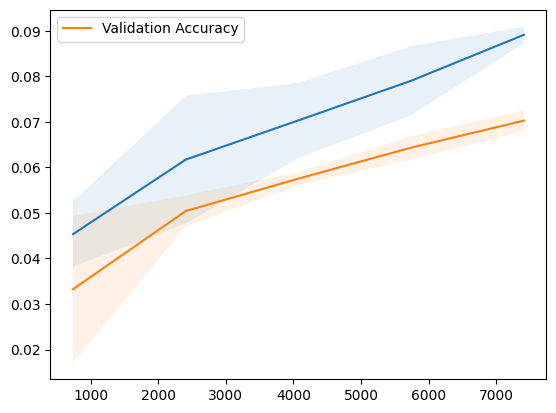

In [ ]:
## generates and plots a learning curve using 5-fold cross-validation to visualize how model
## performance (training and validation accuracy) changes with inc training data size, helps assess
## bias and variance

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    classifier, 
    trainX_scaled, 
    trainY, 
    # 5-fold cross-validation
    cv = 5,
    # performance metric
    scoring = 'accuracy',
    train_sizes = np.linspace(0.1, 1.0, 5), 
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.legend()
plt.show()

**5.3 Diagnose**

In [ ]:
## demonstrates model overfitting and underfitting in SVM by training with extreme C values: 
## small C (0.1): high regularization - underfitting
## large C (10): low regularization - overfitting

# underfitting
clf = SVC(C = 0.1)
clf.fit(trainX_scaled, trainY)

# overfitting
clf = SVC(C = 10)
clf.fit(trainX_scaled, trainY)

SVC(C=10)

## Questions

**How balanced is the dataset across classes? Are some classes over- or under-represented?**

The dataset is unbalanced, so some people have many images while others have very few. This can bias the model toward individuals with more samples.

**How might image resolution affect training time and model performance?**

Higher resolution increases training time and memory use but may improve accuracy. Lower resolution trains faster but can lose important facial details.

**How does changing hyperparameters impact results?**

Tuning parameters like C and gamma in SVM affects bias and variance: smaller C could underfit, larger C could overfit. The best values balance both training and validation accuracy.

**Which cross-validation strategy is most appropriate for this dataset? Why, in your opinion?**

A k-fold cross-validation (like 5-fold) is appropriate because it helps assess generalization across different subsets without wasting data for validation.

**Where does the model make the most errors (confusion matrix analysis)?**

The confusion matrix shows most errors occur between people with similar facial features or lighting conditions, causing misclassification between lookalike faces.

**How can we detect overfitting in this pipeline?**

Overfitting is detected when training accuracy is much higher than validation accuracy or when the learning curve shows a wide gap between them.

**What regularization or augmentation strategies will reduce overfitting?**

Using stronger regularization (smaller C in SVM), applying data augmentation, or adding dropout layers in deeper models can help reduce overfitting.